In [1]:
using LensFactory
using LensFactory.Constants
using CairoMakie

[ Info: Precompiling PlotExt [f9501e60-28eb-5d66-a001-f844a3a3745e] (cache misses: include_dependency fsize change (2), wrong dep version loaded (4))


## Set up cosmology

In [2]:
# Initialize default cosmology
cosmo = Cosmology.init_cosmology()

# Lens and source redshifts
zl = 0.5
zs = 1.5

# ADDs and distance ratio
Dol = Cosmology.angular_diameter_distance(cosmo, 0., zl)
Dls = Cosmology.angular_diameter_distance(cosmo, zl, zs)
Dos = Cosmology.angular_diameter_distance(cosmo, 0., zs)
adis = Dls/Dos

# Create image plane grid
x, y = Lenses.get_meshgrid(5*ANGLE_ARCSEC, 5*ANGLE_ARCSEC, 0.01*ANGLE_ARCSEC);

## Point mass lens

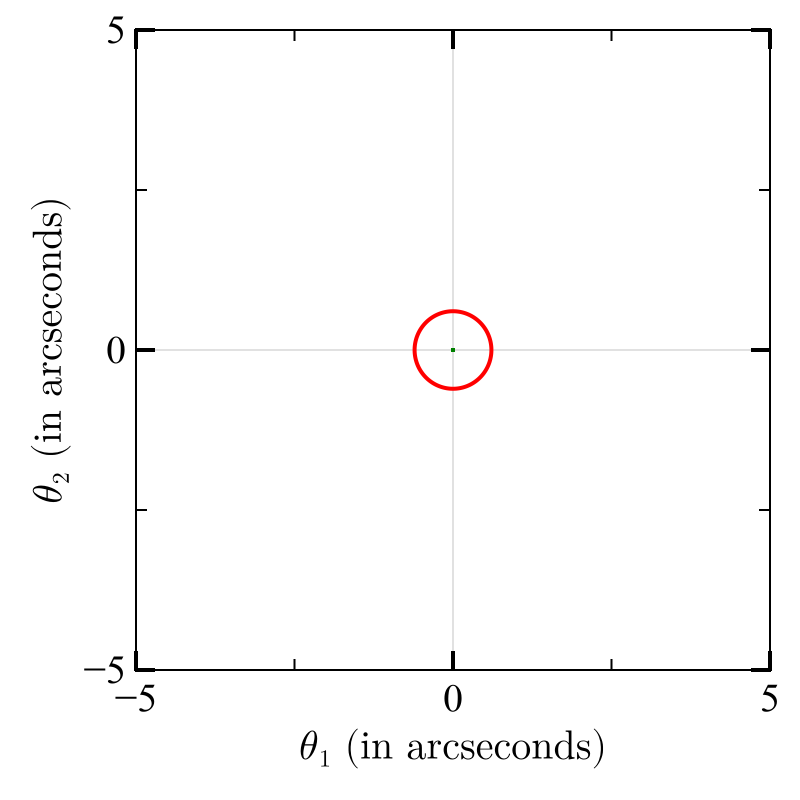

CairoMakie.Screen{IMAGE}


In [3]:
# Initialize an isolated point mass lens
lens = Lenses.init_PointLens(D_d = Dol, mass=1E11*MASS_SUN)
fig, ax = Lenses.plot_image_plane(lens, x, y, adis)
display(fig)

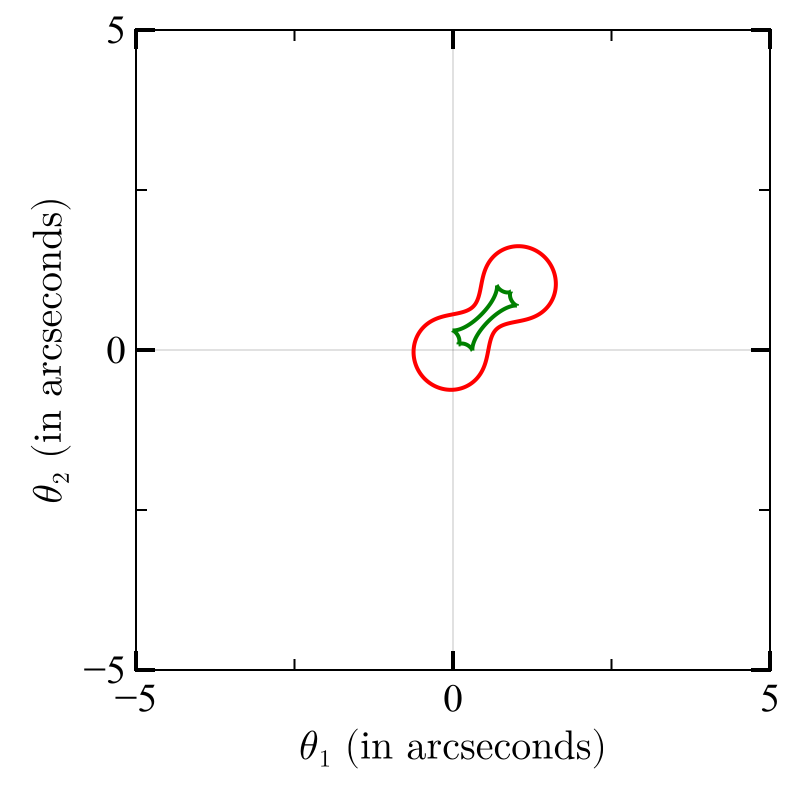

CairoMakie.Screen{IMAGE}


In [4]:
# Initialize a two component lens
lens = Lenses.init_CompositeLens([(lens=:PointLens, D_d=Dol, x_c=0.0*ANGLE_ARCSEC, y_c=0.0*ANGLE_ARCSEC, mass=1E11*MASS_SUN),
                                  (lens=:PointLens, D_d=Dol, x_c=1.0*ANGLE_ARCSEC, y_c=1.0*ANGLE_ARCSEC, mass=1E11*MASS_SUN)])
fig, ax = Lenses.plot_image_plane(lens, x, y, adis)
display(fig)

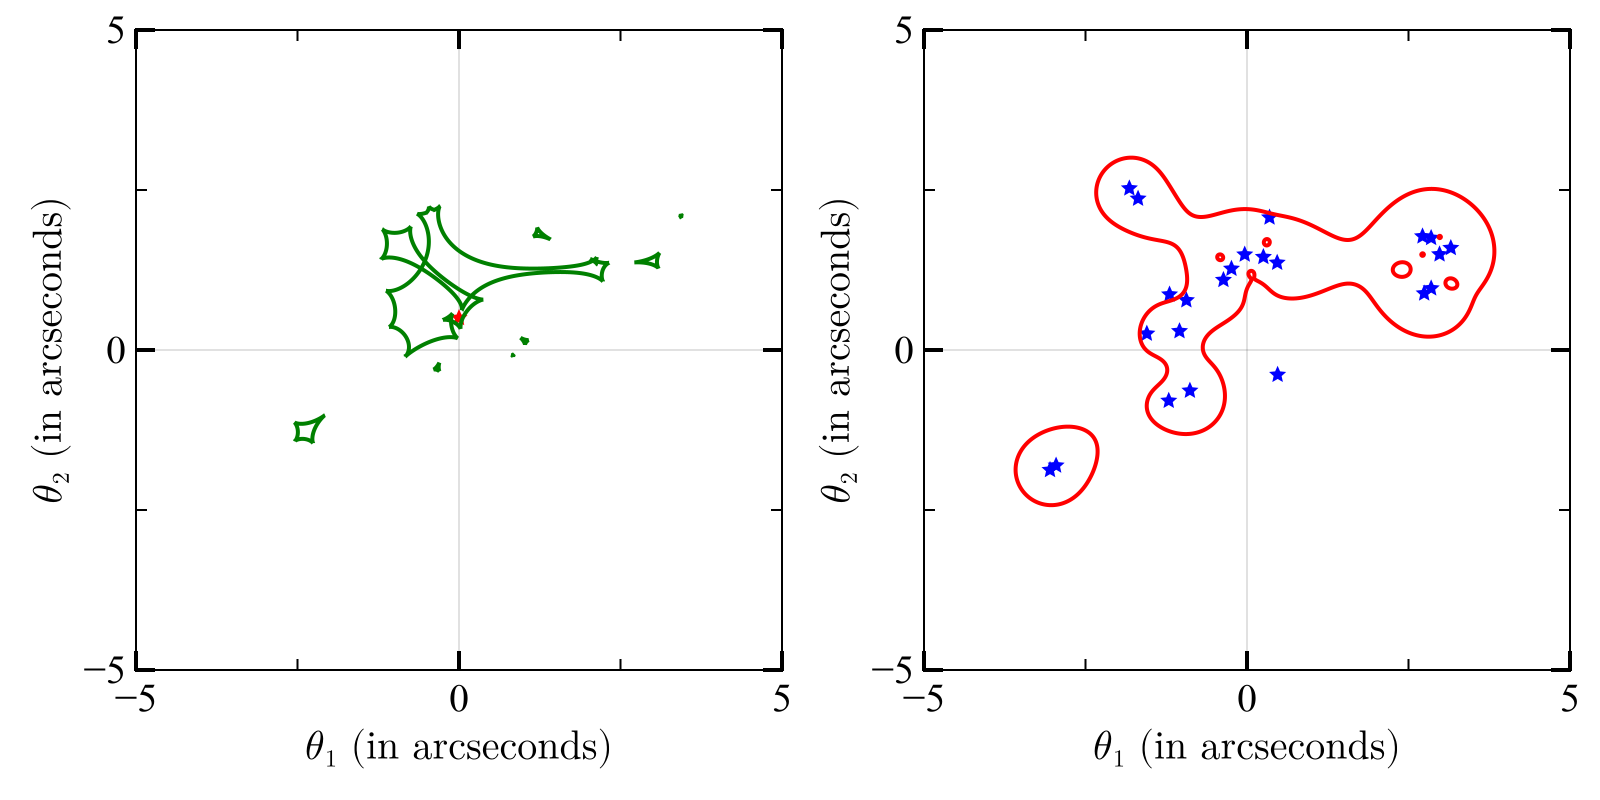

CairoMakie.Screen{IMAGE}


In [5]:
using Random
Random.seed!(1234)

src = (0*ANGLE_ARCSEC, 0.5*ANGLE_ARCSEC)
# Initialize a lens made of multiple point mass lenses
n_point = 10
ensamble = [(lens=:PointLens, D_d=Dol, x_c=(-3.0+6.0*rand())*ANGLE_ARCSEC, y_c = (-3.0+6.0*rand())*ANGLE_ARCSEC, mass=1E11*MASS_SUN) for _ in 1:n_point]
lens = Lenses.init_CompositeLens(ensamble)

# Here we have split the source and image plane for better visualization using "two_panel" keyword
fig, ax = Lenses.plot_image_plane(lens, x, y, adis; two_panel=true, source=src)
display(fig)


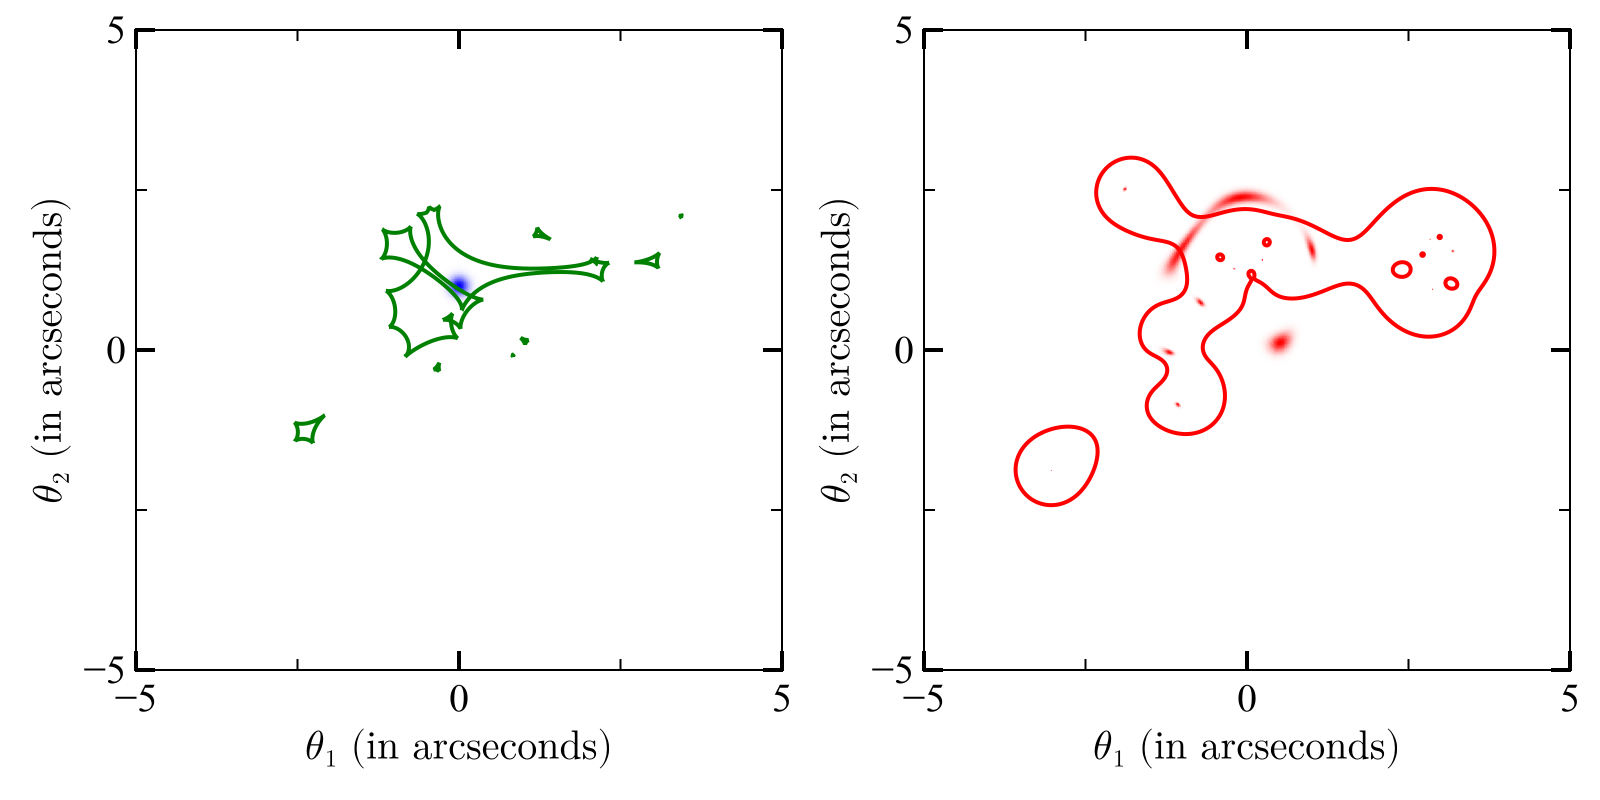

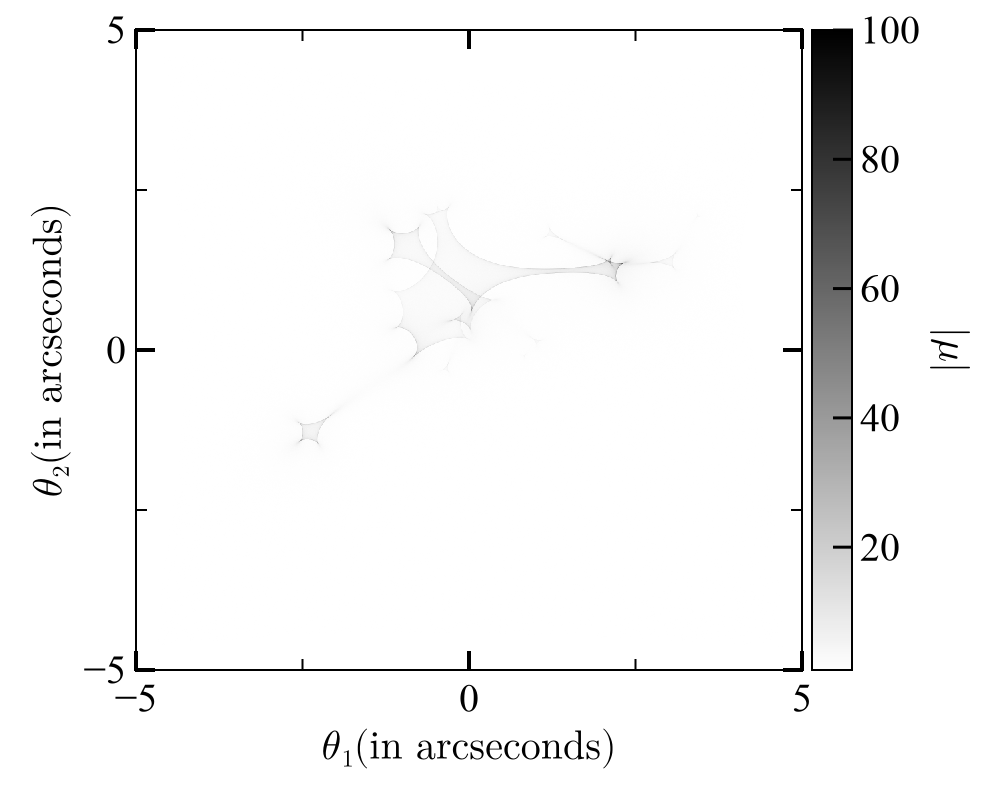

CairoMakie.Screen{IMAGE}


In [ ]:
# Let us add a point source
src = Sources.gaussian(x, y, 0.1*ANGLE_ARCSEC, 0.1*ANGLE_ARCSEC, (0.0*ANGLE_ARCSEC, 1.0*ANGLE_ARCSEC), A=ANGLE_ARCSEC^2)
fig, ax = Lenses.plot_image_plane(lens, x, y, adis; two_panel=true, source=src)
display(fig)

fig, ax = Lenses.plot_magnification_map(lens, x, y, adis; plane=:source, rays_per_pixel=100)
display(fig)

## SIS Lens

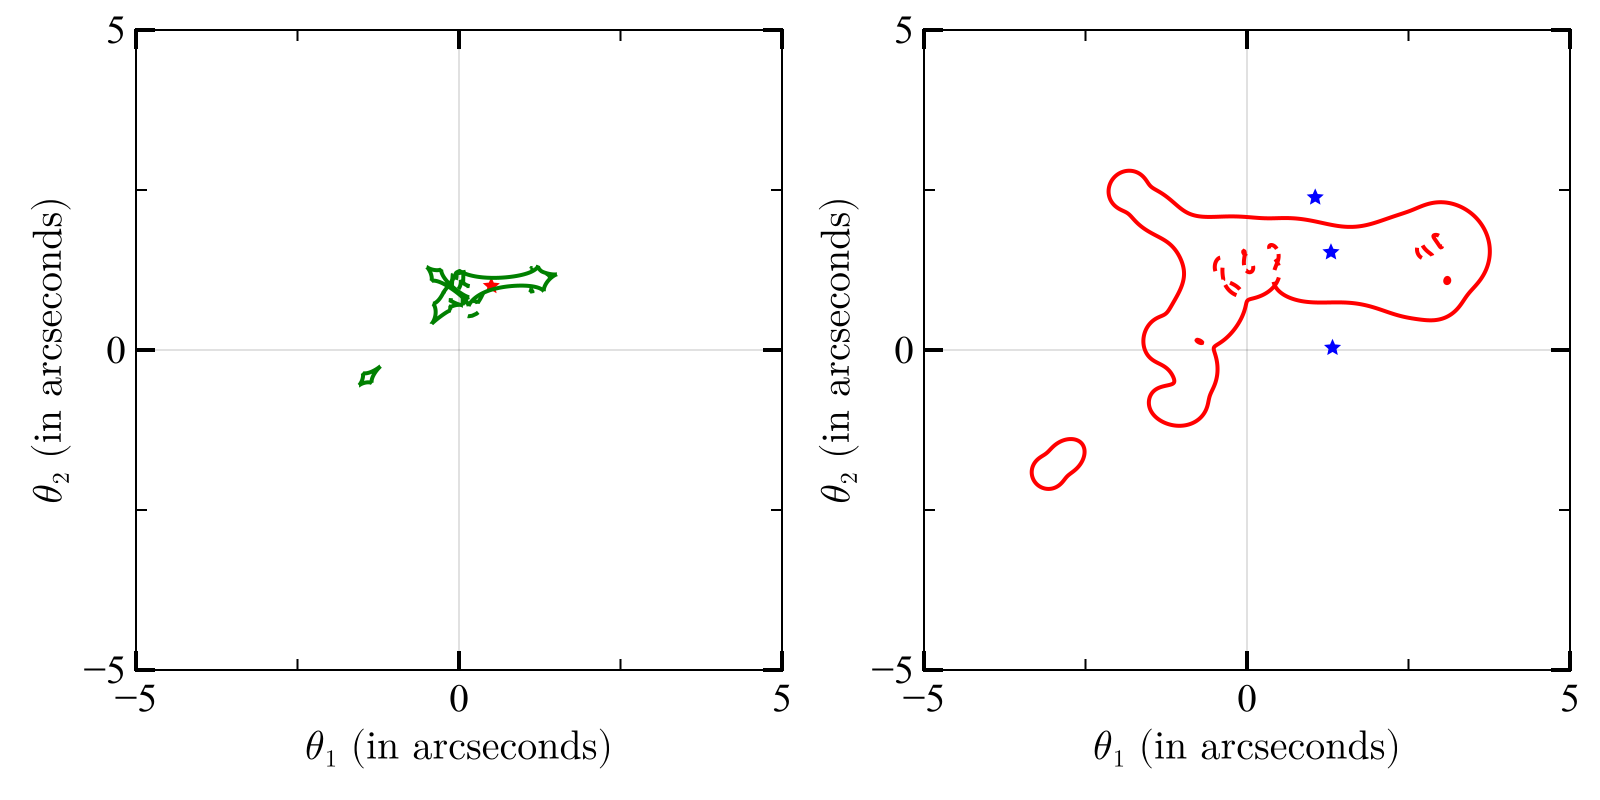

CairoMakie.Screen{IMAGE}


In [8]:
# Initialize a lens made of multiple SIS lenses
Random.seed!(1234)

src = (0.5*ANGLE_ARCSEC, 1.0*ANGLE_ARCSEC)

n_point = 10
ensamble = [(lens=:SISLens, x_c=(-3.0+6.0*rand())*ANGLE_ARCSEC, y_c = (-3.0+6.0*rand())*ANGLE_ARCSEC, v_d=120E3) for _ in 1:n_point]
lens = Lenses.init_CompositeLens(ensamble)

# Here we have split the source and image plane for better visualization using "two_panel" keyword
fig, ax = Lenses.plot_image_plane(lens, x, y, adis; two_panel=true, source=src)
display(fig)

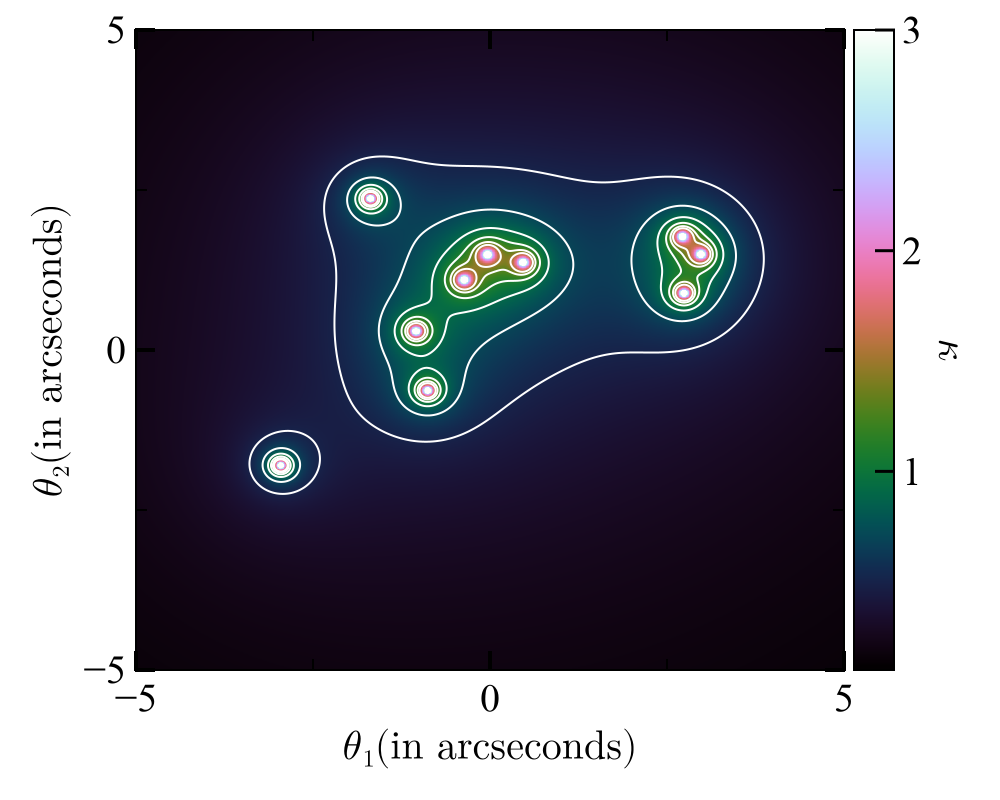

CairoMakie.Screen{IMAGE}


In [9]:
# Plot surface density
fig, ax = Lenses.plot_surface_density(lens, x, y; D_d=Dol, D_ds=Dls, D_s=Dos, unit=:convergence, 
                                             heatmap_kws=(colorrange=(0.1, 3.0), colormap=:cubehelix), 
                                             plot_contour=true,
                                             contour_kws=(linewidth=1, levels=0.5:0.2:1.5, color=:white))
display(fig)

## Plummer Lens

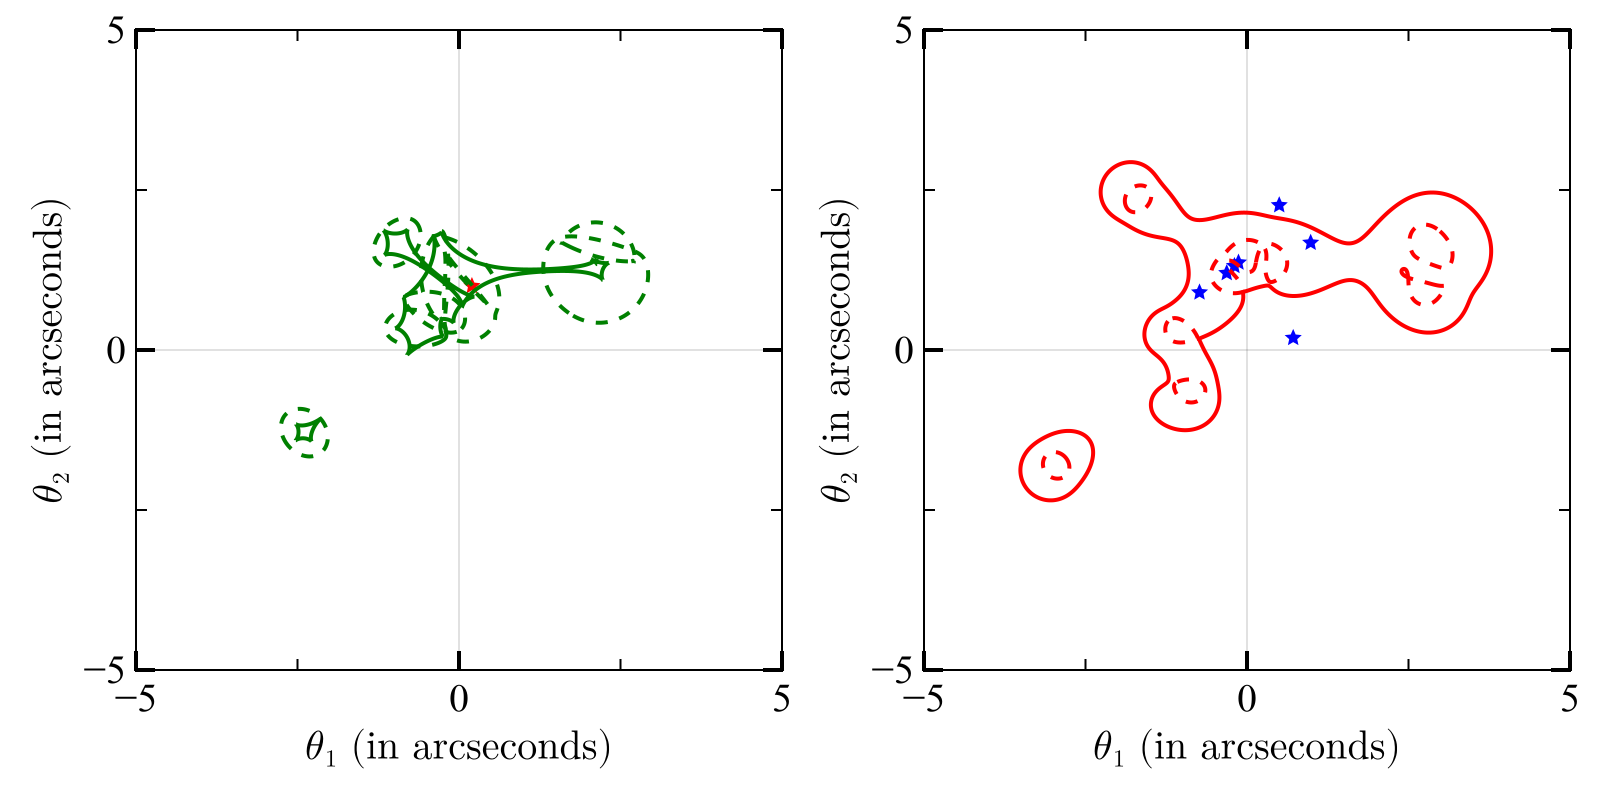

CairoMakie.Screen{IMAGE}


In [11]:
# Initialize a lens made of multiple SIS lenses
Random.seed!(1234)

n_point = 10
ensamble = [(lens=:PlummerLens, D_d=Dol, x_c=(-3.0+6.0*rand())*ANGLE_ARCSEC, y_c = (-3.0+6.0*rand())*ANGLE_ARCSEC, x_s=0.3*ANGLE_ARCSEC, mass=1E11*MASS_SUN) for _ in 1:n_point]
lens = Lenses.init_CompositeLens(ensamble)

# Here we have split the source and image plane for better visualization using "two_panel" keyword
fig, ax = Lenses.plot_image_plane(lens, x, y, adis; two_panel=true, source=(0.2*ANGLE_ARCSEC, 1.0*ANGLE_ARCSEC))
display(fig)

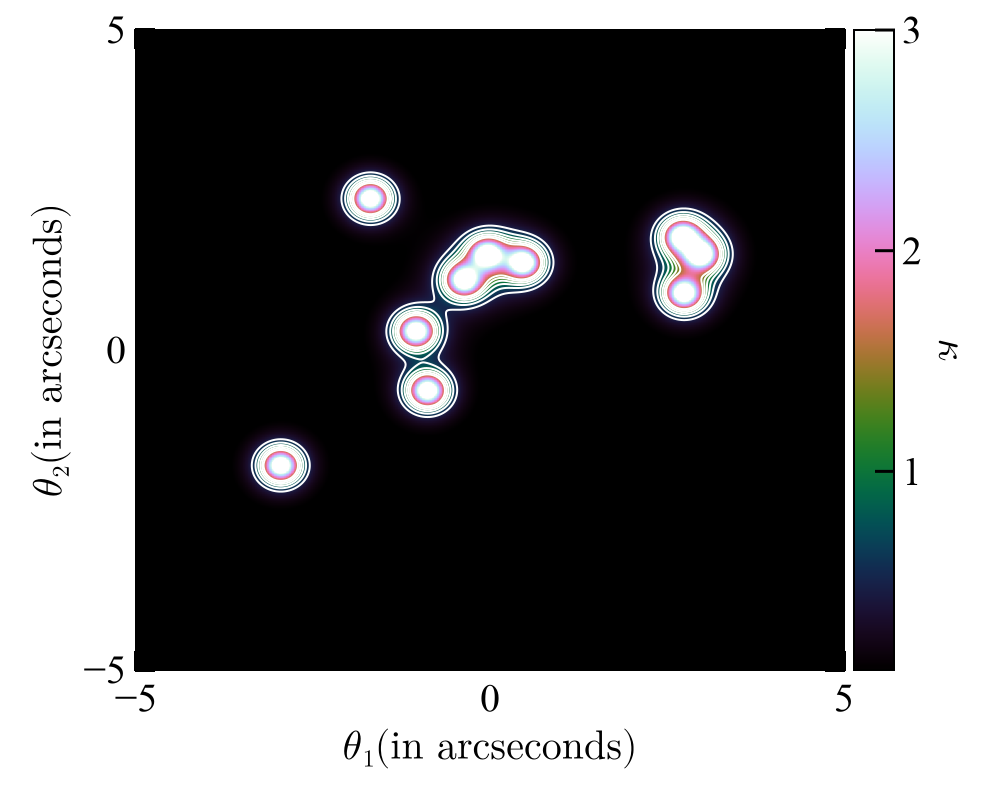

CairoMakie.Screen{IMAGE}


In [12]:
fig, ax = Lenses.plot_surface_density(lens, x, y; D_d=Dol, D_ds=Dls, D_s=Dos, unit=:convergence, 
                                             heatmap_kws=(colorrange=(0.1, 3.0), colormap=:cubehelix), 
                                             plot_contour=true,
                                             contour_kws=(linewidth=1, levels=0.5:0.2:1.5, color=:white))
display(fig)

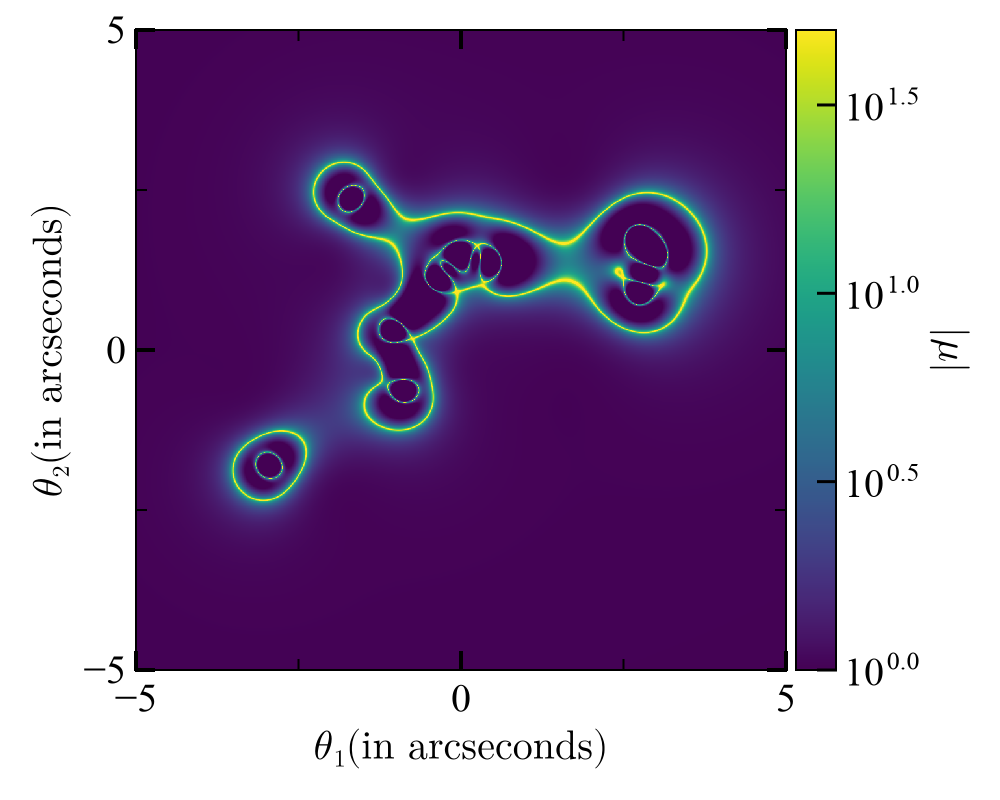

CairoMakie.Screen{IMAGE}


In [13]:
fig, ax = Lenses.plot_magnification_map(lens, x, y, adis; plane=:image, heatmap_kws=(colorrange=(1,50),colormap=:viridis, colorscale=log10))
display(fig)

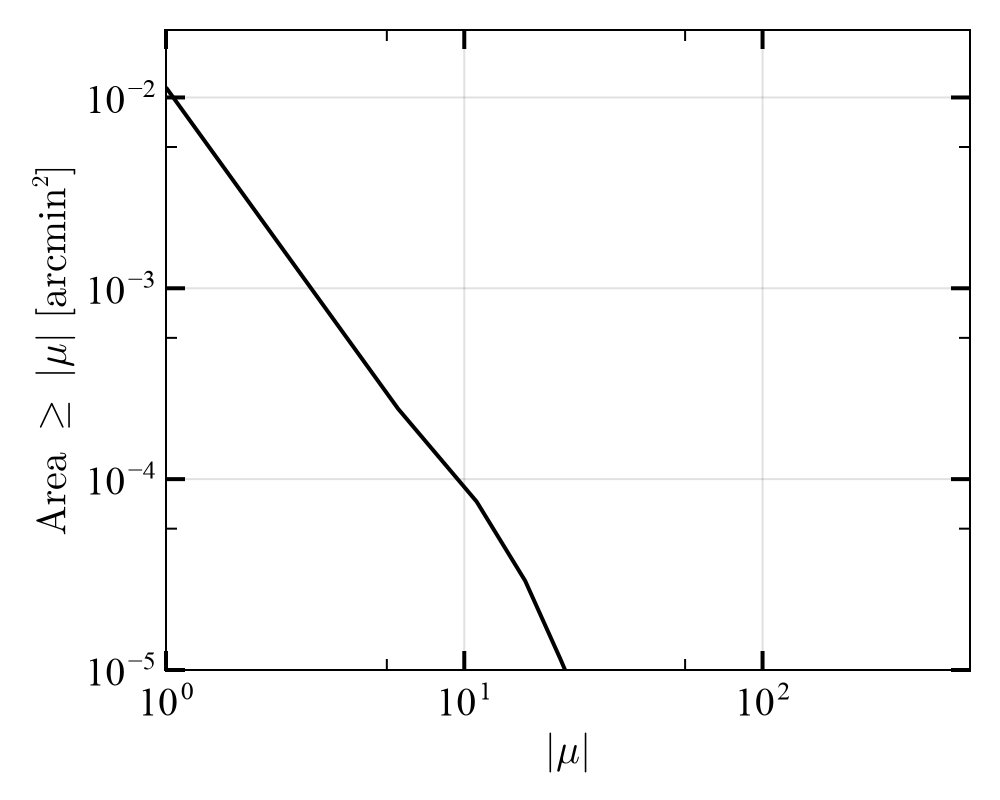

CairoMakie.Screen{IMAGE}


In [14]:
fig, ax = Lenses.plot_magnification_profile(lens, x, y, adis; plane=:source, rays_per_pixel=10)
display(fig)